# Initialiser Spark dans un Notebook

In [1]:
try:
    spark.stop()
    print("✅ Old Spark session stopped.")
except:
    pass


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("US_Accidents_Analysis") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()

spark.sparkContext.setLogLevel("ERROR")
print("🚀 Spark ready.")


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/07/06 18:42:36 WARN Utils: Your hostname, DESKTOP-DD5N9SQ, resolves to a loopback address: 127.0.1.1; using 172.30.170.111 instead (on interface eth0)
25/07/06 18:42:36 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/06 18:42:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/07/06 18:42:44 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


🚀 Spark ready.


In [3]:
spark.catalog.clearCache()
print("🧹 Spark cache cleared.")


🧹 Spark cache cleared.


# Charger et échantillonner et afficher la dataset Spark

In [4]:
# ⚙️ 1. Importer les librairies nécessaires
import pandas as pd

# 📂 2. Lire le dataset depuis le dossier "dataset"
print("Chargement du dataset avec Spark...")
df = spark.read.csv("../dataset/US_Accidents.csv", header=True, inferSchema=True)

# 👀 3. Afficher un aperçu brut avec Spark (pour vérifier rapidement)
print("Aperçu brut (Spark) :")
df.show(3)

# 🧪 4. Créer un petit échantillon (évite de charger tout le dataset dans la RAM)
print("Création d'un échantillon (100 lignes)...")
df_sample = df.limit(100).toPandas()

# 🧼 5. Configurer pandas pour afficher toutes les colonnes lisiblement
print("Configuration de l'affichage des colonnes (Pandas)...")
pd.set_option("display.max_columns", None)     # Affiche toutes les colonnes
pd.set_option("display.max_colwidth", None)    # Ne tronque pas les valeurs longues

# 📊 6. Afficher le tableau final (joli affichage dans Jupyter)
print("Affichage de l’échantillon sous forme de tableau :")
df_sample.head(5)


Chargement du dataset avec Spark...


Aperçu brut (Spark) :
+---+-------+--------+-------------------+-------------------+-----------------+----------+-------+-------+------------+--------------------+--------------+------------+----------+-----+----------+-------+----------+------------+-------------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
| ID| Source|Severity|         Start_Time|           End_Time|        Start_Lat| Start_Lng|End_Lat|End_Lng|Distance(mi)|         Description|        Street|        City|    County|State|   Zipcode|Country|  Timezone|Airport_Code|  Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity| Bu

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect delays.,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at Dela Palma Rd. Expect delays.,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US-35. Expect delays.,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Centerville Rd. Expect delays.,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


 # CLEANING CODE FOR SPARK
 

In [5]:
# Step 1: Drop unnecessary columns
cols_to_drop = [
    'ID', 'Source', 'Description', 'End_Lat', 'End_Lng',
    'Zipcode', 'Country', 'Timezone', 'Airport_Code',
    'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
    'Turning_Loop'  # always false
]

df_clean = df.drop(*cols_to_drop)
print(f"Dropped {len(cols_to_drop)} columns.")


Dropped 13 columns.


In [6]:
#  Step 2: Drop rows with too many missing values
# Drop rows with more than 30% nulls
threshold = int(len(df_clean.columns) * 0.7)
df_clean = df_clean.dropna(thresh=threshold)
print("Dropped rows with too many missing values.")

Dropped rows with too many missing values.


In [7]:
#  Step 3: Convert timestamp columns
from pyspark.sql.functions import to_timestamp

df_clean = df_clean.withColumn("Start_Time", to_timestamp("Start_Time"))
df_clean = df_clean.withColumn("End_Time", to_timestamp("End_Time"))
df_clean = df_clean.withColumn("Weather_Timestamp", to_timestamp("Weather_Timestamp"))
print("Converted time columns to timestamp.")


Converted time columns to timestamp.


In [8]:
# Step 4: Handle nulls (imputation / fill)
from pyspark.sql.functions import lit

# Fill numeric columns with mean or placeholder
df_clean = df_clean.fillna({
    'Temperature(F)': 60.0,
    'Humidity(%)': 60.0,
    'Pressure(in)': 29.9,
    'Visibility(mi)': 10.0,
    'Wind_Speed(mph)': 5.0,
    'Precipitation(in)': 0.0,
})

# Fill categorical string columns with 'Unknown'
df_clean = df_clean.fillna({
    'Weather_Condition': 'Unknown',
    'Wind_Direction': 'Unknown',
    'Street': 'Unknown',
    'City': 'Unknown',
    'County': 'Unknown',
    'State': 'Unknown',
    'Sunrise_Sunset': 'Unknown'
})

print("Handled remaining missing values.")


Handled remaining missing values.


In [9]:
# Step 5: Remove duplicates
df_clean = df_clean.dropDuplicates()
print("Dropped duplicate rows.")


Dropped duplicate rows.


In [10]:
# Step 6: (Optional) Filter unrealistic or invalid values
# Filter distance > 0 and severity in [1, 2, 3, 4]
df_clean = df_clean.filter((df_clean["Distance(mi)"] > 0) & (df_clean["Severity"].isin([1, 2, 3, 4])))
print("Filtered unrealistic distances and invalid severities.")


Filtered unrealistic distances and invalid severities.


## Check final result

In [11]:
df_clean.printSchema()
df_clean.show(5)
print(f"Number of rows after cleaning: {df_clean.count()}")


root
 |-- Severity: integer (nullable = true)
 |-- Start_Time: timestamp (nullable = true)
 |-- End_Time: timestamp (nullable = true)
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Street: string (nullable = false)
 |-- City: string (nullable = false)
 |-- County: string (nullable = false)
 |-- State: string (nullable = false)
 |-- Weather_Timestamp: timestamp (nullable = true)
 |-- Temperature(F): double (nullable = false)
 |-- Wind_Chill(F): double (nullable = true)
 |-- Humidity(%): double (nullable = false)
 |-- Pressure(in): double (nullable = false)
 |-- Visibility(mi): double (nullable = false)
 |-- Wind_Direction: string (nullable = false)
 |-- Wind_Speed(mph): double (nullable = false)
 |-- Precipitation(in): double (nullable = false)
 |-- Weather_Condition: string (nullable = false)
 |-- Amenity: boolean (nullable = true)
 |-- Bump: boolean (nullable = true)
 |-- Crossing: boolean (nullable = 

+--------+-------------------+-------------------+------------------+-------------------+------------+----------------+-------------+-------------+-----+-------------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+--------------+
|Severity|         Start_Time|           End_Time|         Start_Lat|          Start_Lng|Distance(mi)|          Street|         City|       County|State|  Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity| Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station| Stop|Traffic_Calming|Traffic_Signal|Sunrise_Sunset|
+--------+-------------------+-------------------+------------------+-------------------+------------+----------------+-----

[Stage 9:===================================================>     (10 + 1) / 11]

Number of rows after cleaning: 4305651


In [12]:
# To View the Cleaned Data Clearly (Like a Real Table in Notebook)
df_sample_clean = df_clean.limit(10000).toPandas()

import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

df_sample_clean.head(5)  # Shows clean, readable table


,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset
0,3,2016-02-09 07:03:20,2016-02-09 07:33:20,39.976398,-83.119225,0.01,Outerbelt S,Columbus,Franklin,OH,2016-02-09 07:20:00,21.2,8.3,93.0,29.66,1.5,WSW,13.8,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,Night
1,2,2016-02-11 08:13:24,2016-02-11 08:43:24,39.749916,-84.139359,0.01,US-35 E,Dayton,Montgomery,OH,2016-02-11 07:58:00,7.5,-1.1,87.0,30.28,10.0,SSW,4.6,0.0,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,Day
2,3,2016-12-01 22:07:18,2016-12-01 22:37:03,37.702499,-122.016930,0.01,I-580 E,Castro Valley,Alameda,CA,2016-12-01 21:54:00,46.0,43.1,63.0,30.18,10.0,ENE,5.8,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Night
3,3,2016-12-21 21:00:33,2016-12-21 21:30:14,38.642693,-121.429085,0.01,Raley Blvd,Sacramento,Sacramento,CA,2016-12-21 21:10:00,44.6,41.4,81.0,30.08,6.0,SE,5.8,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Night
4,3,2016-12-26 00:44:15,2016-12-26 01:28:48,37.786995,-122.389870,0.01,James Lick Fwy N,San Francisco,San Francisco,CA,2016-12-26 00:53:00,42.1,36.6,76.0,30.19,10.0,ENE,9.2,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Night


In [14]:
# 💾 Sauvegarde du DataFrame nettoyé en format Parquet
df_clean.write.parquet("cleaned_data_parquet", mode="overwrite")

print("✅ Données sauvegardées en Parquet dans le dossier 'cleaned_data_parquet'")


✅ Données sauvegardées en Parquet dans le dossier 'cleaned_data_parquet'


# Compare Missing Values (Before vs After Cleaning)

/tmp/ipykernel_6777/406857335.py:20: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/souhail/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


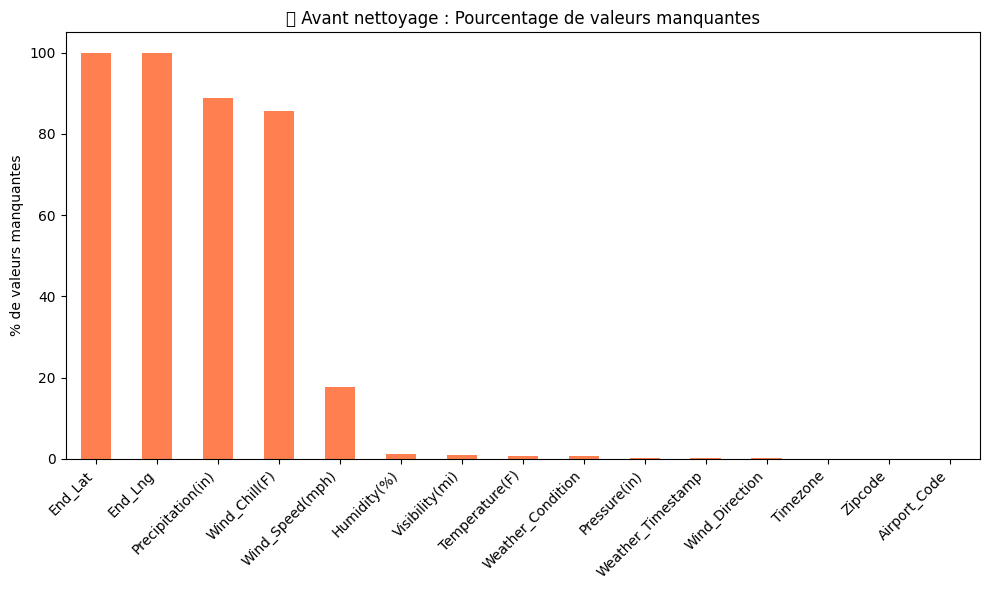

📈 Après nettoyage : Pourcentage de valeurs manquantes — Aucun champ manquant détecté 🎉


In [19]:
import matplotlib.pyplot as plt

# ✅ Convertir vers pandas (échantillons limités pour performance)
df_raw_sample = df.limit(10000).toPandas()
df_clean_sample = df_clean.limit(10000).toPandas()

# 📊 Fonction pour afficher les valeurs manquantes
def plot_missing(df, title):
    missing = df.isnull().mean() * 100
    missing = missing[missing > 0].sort_values(ascending=False)

    if missing.empty:
        print(f"{title} — Aucun champ manquant détecté 🎉")
    else:
        plt.figure(figsize=(10, 6))
        missing.plot(kind='bar', color='coral')
        plt.title(title)
        plt.ylabel('% de valeurs manquantes')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# 📌 Affichage des deux comparaisons
plot_missing(df_raw_sample, "📉 Avant nettoyage : Pourcentage de valeurs manquantes")
plot_missing(df_clean_sample, "📈 Après nettoyage : Pourcentage de valeurs manquantes")


# Compare Distribution of Key Feature (e.g., Severity)

In [20]:
df_raw_sample = df.limit(10000).toPandas()
df_clean_sample = df_clean.limit(10000).toPandas()

# Vérifie que la colonne Severity existe dans les deux
print("Colonnes dans df_raw_sample:", df_raw_sample.columns)
print("Colonnes dans df_clean_sample:", df_clean_sample.columns)


Colonnes dans df_raw_sample: Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
Colonnes dans df_clean_sample: Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Street', 'City', 'County', 'State',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Hum

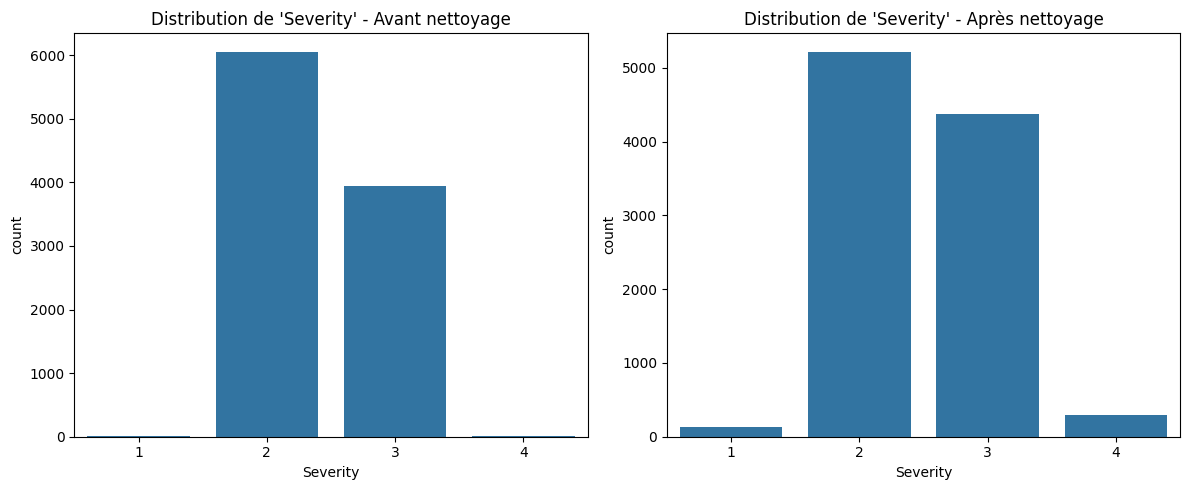

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

if "Severity" in df.columns and "Severity" in df_clean.columns:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.countplot(x="Severity", data=df_raw_sample)
    plt.title("Distribution de 'Severity' - Avant nettoyage")

    plt.subplot(1, 2, 2)
    sns.countplot(x="Severity", data=df_clean_sample)
    plt.title("Distribution de 'Severity' - Après nettoyage")

    plt.tight_layout()
    plt.show()
else:
    print("La colonne 'Severity' est manquante dans l’un des DataFrames.")


# Compare Number of Rows

In [24]:
# 🧮 Nombre de lignes avant nettoyage
nb_raw = df.count()
print(f"🗃️ Nombre de lignes AVANT nettoyage : {nb_raw:,}")

# 🧼 Nombre de lignes après nettoyage
nb_clean = df_clean.count()
print(f"🧹 Nombre de lignes APRÈS nettoyage : {nb_clean:,}")

# 🔍 Différence
nb_removed = nb_raw - nb_clean
print(f"❌ Lignes supprimées : {nb_removed:,} ({(nb_removed / nb_raw) * 100:.2f}%)")


🗃️ Nombre de lignes AVANT nettoyage : 7,728,394


🧹 Nombre de lignes APRÈS nettoyage : 4,305,651
❌ Lignes supprimées : 3,422,743 (44.29%)


# Feature Engineering

# Encodage des variables catégorielles avec :

# 1-StringIndexer

In [42]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

# 🔠 Colonnes catégorielles à encoder
cat_cols = ["City", "County", "State", "Wind_Direction", "Weather_Condition", "Sunrise_Sunset"]
# 📦 Création des indexers
indexers = [StringIndexer(inputCol=col, outputCol=col + "_indexed", handleInvalid="keep") for col in cat_cols]

# 🔁 Pipeline des transformations
pipeline = Pipeline(stages=indexers)

# ▶️ Appliquer sur les données
df_indexed = pipeline.fit(df_clean).transform(df_clean)
df_indexed.select(cat_cols + [col + "_indexed" for col in cat_cols]).show(10, truncate=False)


+-------------+-------------+-----+--------------+-----------------+--------------+------------+--------------+-------------+----------------------+-------------------------+----------------------+
|City         |County       |State|Wind_Direction|Weather_Condition|Sunrise_Sunset|City_indexed|County_indexed|State_indexed|Wind_Direction_indexed|Weather_Condition_indexed|Sunrise_Sunset_indexed|
+-------------+-------------+-----+--------------+-----------------+--------------+------------+--------------+-------------+----------------------+-------------------------+----------------------+
|Columbus     |Franklin     |OH   |WSW           |Light Snow       |Night         |56.0        |64.0          |19.0         |6.0                   |8.0                      |1.0                   |
|Dayton       |Montgomery   |OH   |SSW           |Scattered Clouds |Day           |58.0        |5.0           |19.0         |5.0                   |9.0                      |0.0                   |
|Castro Va

# 2-VectorAssembler

In [43]:
from pyspark.ml.feature import VectorAssembler

# Colonnes numériques que tu veux garder pour assembler (exemple)
num_cols = ["Temperature(F)", "Wind_Chill(F)", "Humidity(%)", "Pressure(in)", 
            "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)", "Distance(mi)"]

# Colonnes indexées issues du StringIndexer
indexed_cols = [col + "_indexed" for col in cat_cols]

# Colonnes totales à assembler
assembler_input = num_cols + indexed_cols

# ⚠️ Important : avant d'assembler, retirer les lignes avec valeurs nulles dans ces colonnes
df_indexed_clean = df_indexed.dropna(subset=assembler_input)

# Création de l'assembleur de features
assembler = VectorAssembler(inputCols=assembler_input, outputCol="features", handleInvalid="skip")

# Transformer les données
df_final = assembler.transform(df_indexed_clean)

# Afficher un aperçu
df_final.select(assembler_input + ["features"]).show(5, truncate=False)


+--------------+-------------+-----------+------------+--------------+---------------+-----------------+------------+------------+--------------+-------------+----------------------+-------------------------+----------------------+--------------------------------------------------------------------+
|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Speed(mph)|Precipitation(in)|Distance(mi)|City_indexed|County_indexed|State_indexed|Wind_Direction_indexed|Weather_Condition_indexed|Sunrise_Sunset_indexed|features                                                            |
+--------------+-------------+-----------+------------+--------------+---------------+-----------------+------------+------------+--------------+-------------+----------------------+-------------------------+----------------------+--------------------------------------------------------------------+
|21.2          |8.3          |93.0       |29.66       |1.5           |13.8           |0.0        

In [45]:
df_final.write.mode("overwrite").parquet("data/df_final.parquet")


In [44]:
# 🎯 Split en 80% train, 20% test avec un seed pour reproductibilité
train_data, test_data = df_final.randomSplit([0.8, 0.2], seed=42)

# Vérification
print(f"Train count: {train_data.count()}")
print(f"Test count: {test_data.count()}")


Train count: 2830383


Test count: 706444


 # Entraînement du modèle + prédictions + évaluation